In [46]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Functions

In [47]:
def _filter_by_sex(df, sex):
    if sex is None: 
        filtered_df = df
    else:    
        filtered_df = df[df["sex"] == sex]
        
    return filtered_df

In [48]:
def plot_by_children(df, sex, color):
    filtered_df = _filter_by_sex(df, sex)

    # Group by number of children and mean BMI for each group
    avg_df = filtered_df.groupby('children')['bmi'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.bar(avg_df['children'], avg_df['bmi'], color=color)
    plt.xlabel('Number of Children')
    plt.ylabel('Average BMI (min. 29)')
    plt.title('Average BMI by Number of Children')
    plt.xticks(avg_df['children'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(29, 32)

    plt.show()

In [49]:
def plot_by_bmi(df, sex, color):
    filtered_df = _filter_by_sex(df, sex)
    
    # Group by number of children and mean BMI for each group
    bmi0_avg_df = filtered_df.groupby('bmi0')['children'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.bar(bmi0_avg_df['bmi0'], bmi0_avg_df['children'], color=color)
    plt.xlabel('Average BMI')
    plt.ylabel('Average Number of Children')
    plt.title(f'Average Number of Children by BMI ({sex if sex else "All"})')
    plt.xticks(bmi0_avg_df['bmi0'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 2.5)
    
    plt.show()

# Plots

In [50]:
# Source: https://www.kaggle.com/datasets/joebeachcapital/medical-insurance-costs
insurance_file = "insurance.csv" 
insurance_df = pd.read_csv(insurance_file)
insurance_df['bmi0'] = insurance_df['bmi'].round(0)
print(insurance_df.shape)
insurance_df.head(3)

(1338, 8)


,age,sex,bmi,children,smoker,region,charges,bmi0
0,19,female,27.90,0,yes,southwest,16884.9240,28.0
1,18,male,33.77,1,no,southeast,1725.5523,34.0
2,28,male,33.00,3,no,southeast,4449.4620,33.0


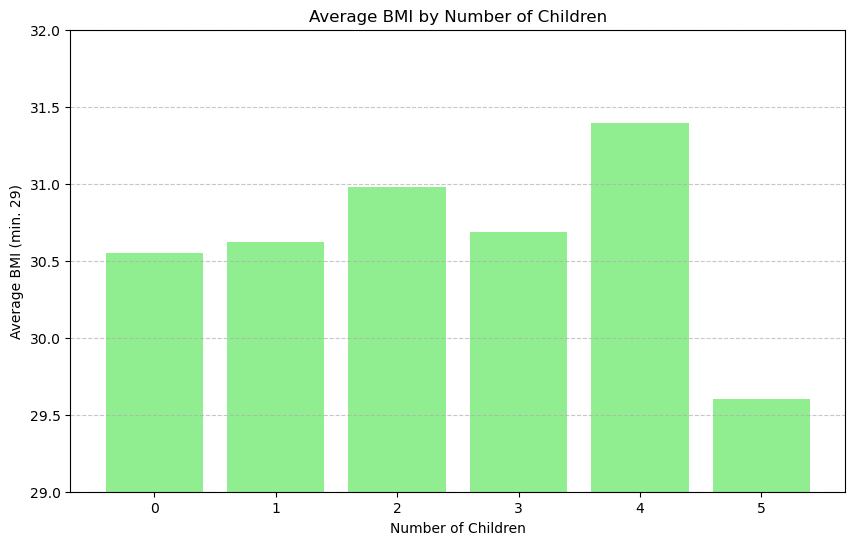

In [51]:
plot_by_children(insurance_df, None, "lightgreen")

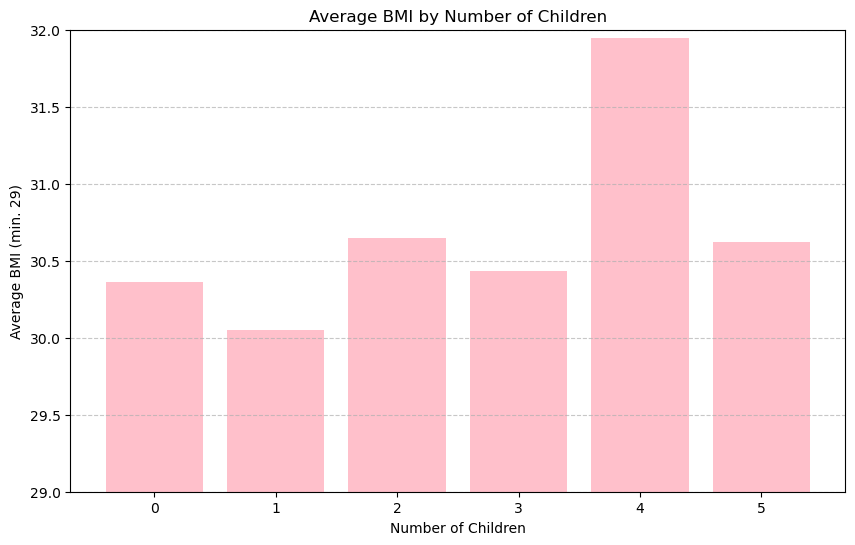

In [52]:
plot_by_children(insurance_df, "female", "pink")

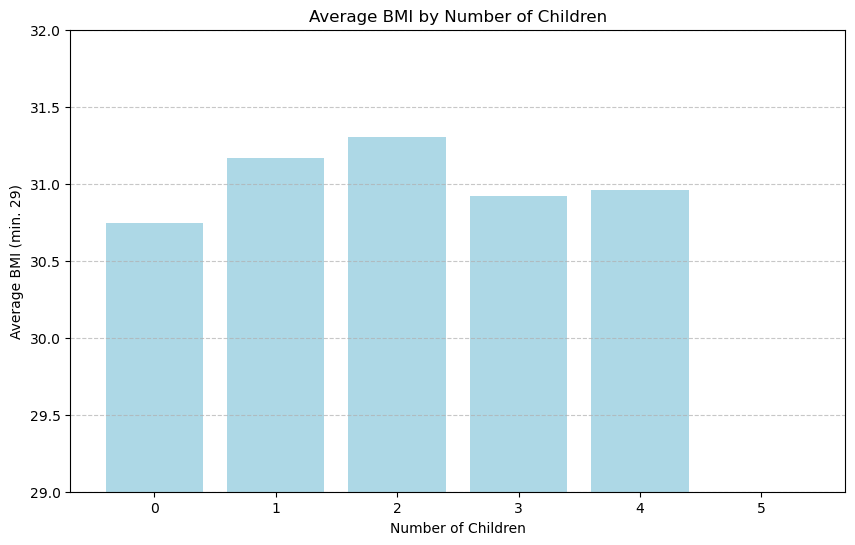

In [53]:
plot_by_children(insurance_df, "male", "lightblue")

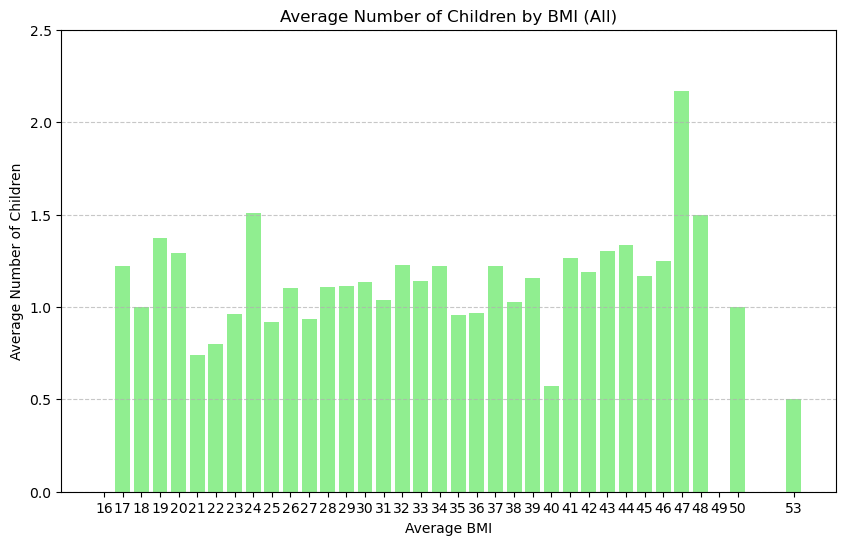

In [54]:
plot_by_bmi(insurance_df, None, "lightgreen")

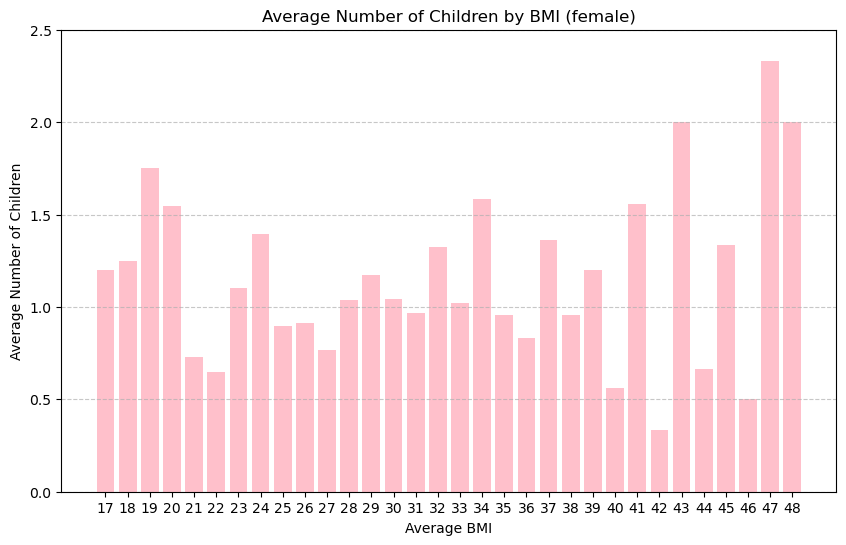

In [55]:
plot_by_bmi(insurance_df, "female", "pink")

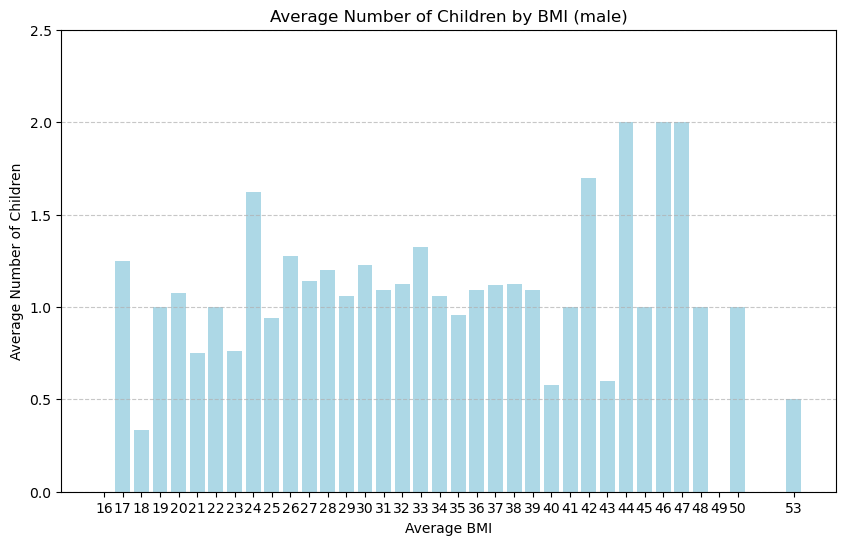

In [56]:
plot_by_bmi(insurance_df, "male", "lightblue")